In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

In [2]:
filename = "/Users/romi_sai/Desktop/College/Senior/Summer2021/CSE474/Assignments/Assignment1/insurance.csv"

In [3]:
#opening csv & reading in rows 
#some parts of this code was found on Python Docs (https://docs.python.org/3/library/csv.html)
with open(filename, newline='') as csvfile:
    lines = csv.reader(csvfile)
    rows=[]
    for row in lines:
        rows.append(row)

In [4]:
#converting the smokers to binary to be able to take the inverse/transpose
for elem in rows:
    if(elem[4] == 'yes'):
        elem[4] = 1
    if(elem[4] == 'no'):
        elem[4] = 0

In [5]:
##Age, BMI and Smoker are the only features we are using!
age=[]
bmi=[]
smoker=[]
charges=[]
test_age=[]
test_bmi=[]
test_smoker=[]
test_charges=[]
train_age=[]
train_bmi=[]
train_smoker=[]
train_charges=[]
train_bias=[]
test_bias=[]

#Converting the age, bmi, smoker and charges to lists for easy access
for thing in rows:
    age.append(thing[0])
    bmi.append(thing[2])
    smoker.append(thing[4])
    charges.append(thing[6])
    
#removing the labels (0 row) from all the lists so we are working with numbers only.    
age.remove('age')
bmi.remove('bmi')
smoker.remove('smoker')
charges.remove('charges')

#print(len(age))

#defining the train and test datasets for the features: age, bmi and smoker for X and charges for Y
for i in range(0, 1070, 1):
    train_bias.append(1)
    train_age.append(age[i])
    train_bmi.append(bmi[i])
    train_smoker.append(smoker[i])
    train_charges.append(charges[i])
    
for j in range(1070, 1338, 1):
    #print(j)
    test_bias.append(1)
    test_age.append(age[j])
    test_bmi.append(bmi[j])
    test_smoker.append(smoker[j])
    test_charges.append(charges[j]) 

In [6]:
###Converting the lists from strings to integers and floats
##This function was found on the numpy docs (https://numpy.org/doc/stable/reference/generated/numpy.matrix.html)
Xtrain = np.matrix((train_bias, train_age, train_bmi,train_smoker), dtype=float)
Xtrain = Xtrain.transpose()

Xtest = np.matrix((test_bias, test_age, test_bmi, test_smoker), dtype=float)
Xtest = Xtest.transpose()

Ytrain = np.matrix((train_charges), dtype=float)
Ytrain = Ytrain.transpose()

Ytest = np.matrix((test_charges), dtype=float)
Ytest = Ytest.transpose()

#Xtrain.shape

### Step 1: Find w using only TRAINING DATA (w=Xt y [Xt X]^-1)

In [7]:
##Is the transposing of w okay? How could I know?
## Is matmul or dot the right way to multiply two matrices? 
##Shouldn't it be 1070 x 1070? 

def find_w(x_train, y_train):
    Xtrain_t = x_train.transpose()
    Xtrain_inv = np.dot(Xtrain_t, x_train)
    Xtrain_inv = np.linalg.inv(Xtrain_inv)
    first_term = np.dot(Xtrain_inv, Xtrain_t)
    
    w = np.dot(first_term, y_train)
    wt = w.transpose()
    return wt

In [8]:
step1_weight = find_w(Xtrain, Ytrain)
print("The weight vector is: \n" + str(step1_weight))

The weight vector is: 
[[-11853.16958248    261.77032429    323.81304386  23619.60977643]]


### Step 2: Find y hat using only TESTING DATA [ŷi = wt * X]

In [9]:
y_pred = np.dot(Xtest, step1_weight.transpose())

print("The Predicted values of Y for each X value from the test dataset is: \n" + str(y_pred))

The Predicted values of Y for each X value from the test dataset is: 
[[33455.69172876]
 [14820.66201229]
 [ 3764.78391357]
 [11634.14863613]
 [ 9790.16203439]
 [ 6105.10876279]
 [10812.05306291]
 [ 2072.8607594 ]
 [29354.4065037 ]
 [15537.90790444]
 [  -88.65564989]
 [ 5536.81687081]
 [ 4554.17296574]
 [ 6723.59167656]
 [14251.26929632]
 [27901.26154409]
 [11926.68119959]
 [13280.80230568]
 [17217.72199475]
 [ 9962.23684735]
 [35788.43949311]
 [12203.54135209]
 [ 4756.23441054]
 [27369.30386179]
 [12147.84621036]
 [ 3010.23517985]
 [36437.23074634]
 [ 4840.94404317]
 [11756.61501004]
 [ 5697.49388571]
 [26588.07096819]
 [11281.71065955]
 [ 8347.44974999]
 [15012.6838491 ]
 [ 7481.96112347]
 [12398.34741964]
 [10663.68164549]
 [ 9725.72464228]
 [ 4667.250165  ]
 [ 6516.09045335]
 [12741.58924613]
 [34144.89527095]
 [32701.98294389]
 [ 3997.53974696]
 [ 2104.20558132]
 [13123.17039666]
 [ 8477.23233363]
 [29103.38705319]
 [31981.17721369]
 [ 2460.01037138]
 [27954.88722995]
 [12548.2092

### Step 3: Find the RMSE using TESTING DATA  

    sqrt((sum(i,N)(yi - predicted_y)^2)/N)

In [10]:
def find_rmse(y_actual, y_prediction):
    difference_squared=[]
    
    for i in range(0,268,1):
        difference = np.subtract(y_actual[i], y_prediction[i])
        squared = np.square(difference)
        difference_squared.append(squared)

    summation = np.sum(difference_squared)
    
    final = summation/268 #only the testing data
    
    sqrt = np.sqrt(final)
    
    return sqrt
   

In [11]:
rmse = find_rmse(Ytest, y_pred)
#6000 - 7000
print(rmse)

6123.81761554638


### Step 4: Plot comparing the actual & predictions

   Compare yPred and Ytest 

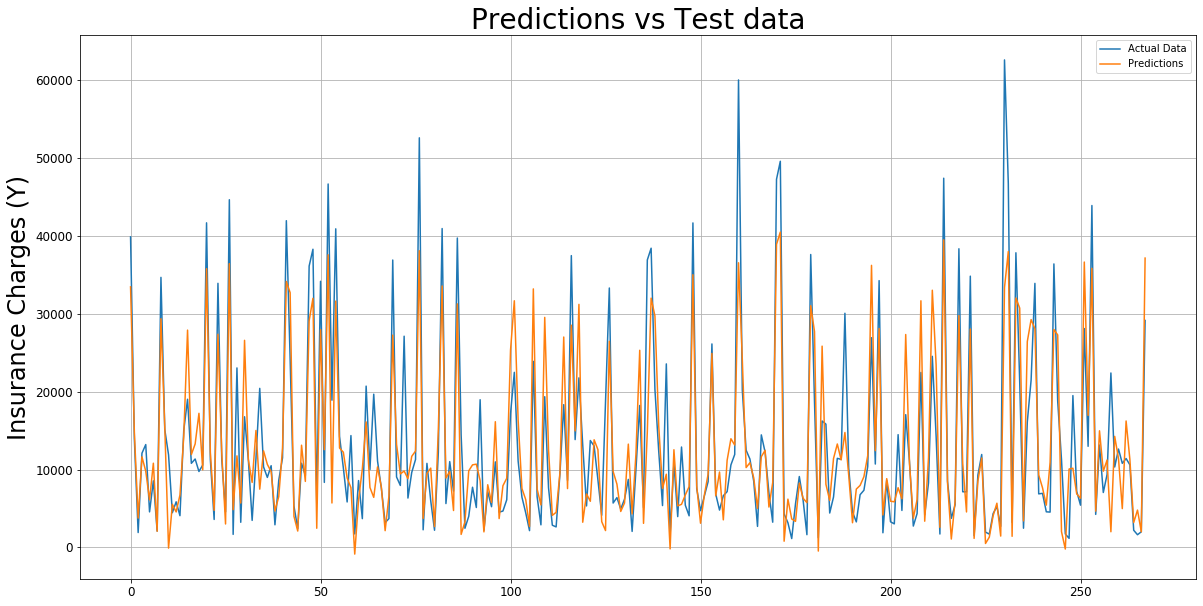

In [12]:
##Plotting the predictions vs the actual data.
plt.figure(figsize=(20,10))
plt.plot(Ytest, label='Actual Data')
plt.plot(y_pred, label='Predictions')
plt.grid()
plt.ylabel('Insurance Charges (Y)', fontsize=24)
plt.title('Predictions vs Test data', fontsize=28)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

# Linear Regression using the Gradient Descent Methods

### Step 1: Finding w using Gradient Descent Method

In [13]:
### Step 1: Initializing random w, to find w

##RERUN THIS UNTIL GRADIENT IS CLOSE TO 0
fake_w = np.matrix([10,20,30,40], dtype=float).transpose()

##Using formula (w = w - alpha(gradient(J(w)))
#Step1: Find Gradient J(w) = -2XtY + 2XtXw
#Calculating -2XtY

for i in range(0, 2000000 , 1):
    firstTerm = np.dot(Xtrain.transpose(), Ytrain )
    firstTerm = firstTerm * -2

    #Calculating 2XtXw
    secondTerm = np.dot(Xtrain.transpose(), Xtrain ) 
    secondTerm = np.dot(secondTerm, fake_w)
    secondTerm = secondTerm * 2

    #calculating the gradient
    gradient = firstTerm + secondTerm
    
    
    ##Using the gradient descent method to calculate the real w
    alpha = 0.0000001
    g_alpha = gradient * alpha
    fake_w = fake_w - g_alpha 
    
    
    if(gradient.all() <= 0.00001):
        print("blah")
        break  


print("The w calculated using the Stochastic Gradient Descent method is: \n"+ str(fake_w))

# w from OLS Estimate: [[-11853.16958248    261.77032429    323.81304386  23619.60977643]]

The w calculated using the Stochastic Gradient Descent method is: 
[[-11853.14956291]
 [   261.77022488]
 [   323.81254869]
 [ 23619.60868888]]


### Step 1.1 : Finding w using Stochastic Gradient Descent Method

In [14]:
## Updating the w using the stochaistic gradient descent method
picked_x = Xtrain[240]
picked_y = Ytrain[240]

#calculating -2(Xi)tYi
first = np.dot(picked_x.transpose(), picked_y)
first = -2 * first

#calculating 2(Xi)tXiw
second = np.dot(picked_x.transpose(), picked_x)
second = np.dot(second, fake_w)
second = 2 * second

#calculating gradient
sg = first + second

##Updating w using w - alpha(gradient(J(w))
sg_alpha = alpha * sg
sg_w = fake_w - sg_alpha

print("The w calculated using the Stochastic Gradient Descent method is: \n"+ str(sg_w))

# w from OLS Estimate: [[-11853.16958248    261.77032429    323.81304386  23619.60977643]]

The w calculated using the Stochastic Gradient Descent method is: 
[[-11853.14779286]
 [   261.81093602]
 [   323.87745641]
 [ 23619.61045892]]
